<img src="https://raw.githubusercontent.com/DHI/modelskill/main/images/logo/modelskill.svg" alt="image" width="400">

# Example 4 - Score MIKE models in relation to observed data

#### Simple example

In [1]:
import modelskill as ms

In [2]:
# Setup a comparison between the model and observation results

cmp = ms.match("data/observation_data.dfs0", "data/model_results.dfs0", obs_item=0, mod_item=0)
cmp

<Comparer>
Quantity: Significant wave height [m]
Observation: observation_data, n_points=67
Model(s):
0: model_results

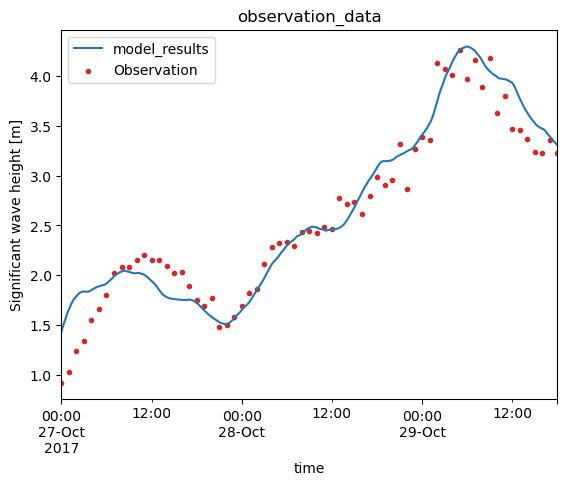

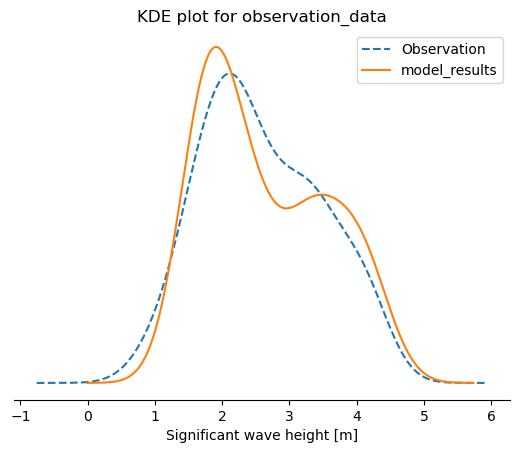

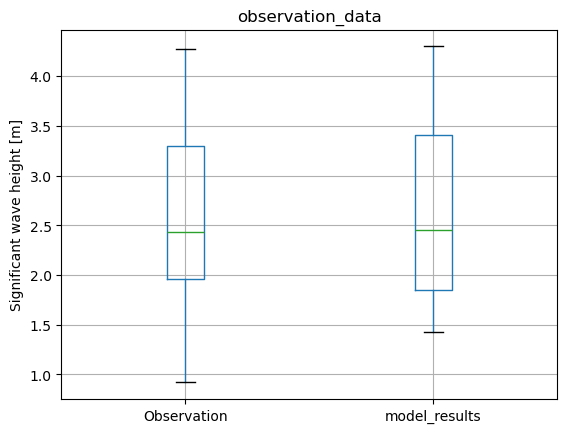

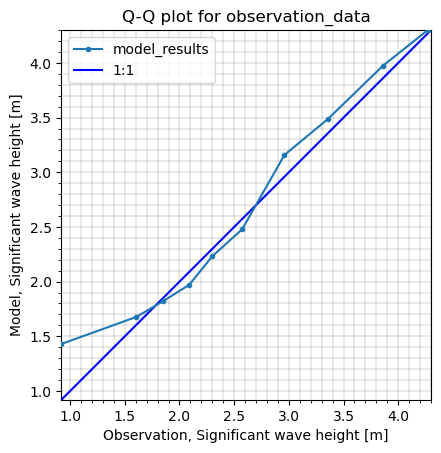

In [3]:
# Plot the comparison in many different ways

cmp.plot.timeseries();
cmp.plot.kde();
cmp.plot.box();
cmp.plot.qq();

In [4]:
# Calculate various fit metrics

cmp.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
observation_data,67,0.052239,0.22824,0.222181,0.174851,0.968321,0.085898,0.929767


In [5]:
# A list of all metrics is available in the documentation, and you can add your own.
# https://dhi.github.io/modelskill/api/metrics/

cmp.skill(metrics=["rmse","willmott", "r2"])

,n,rmse,willmott,r2
observation,,,,
observation_data,67,0.22824,0.98276,0.929767


#### Event based metrics

In [6]:
# Import timeseries data

import pandas as pd

df = pd.read_csv('data/event_timeseries.csv', sep=',', header=0, index_col=0, parse_dates=True)
df.describe()

,model,obs,event
count,4623.000000,4623.000000,4623.000000
mean,0.009067,0.007625,1.176725
std,0.054241,0.050980,5.125146
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.760000,0.761500,29.000000


In [7]:
# Create a comparison

cmp = ms.from_matched(
    data=df, 
    obs_item='obs', 
    mod_items='model', 
    aux_items='event', 
    quantity=ms.Quantity(name='Discharge', unit='m3/s'))
cmp

<Comparer>
Quantity: Discharge [m3/s]
Observation: obs, n_points=4623
Model(s):
0: model
 Auxiliary: event

<Axes: title={'center': 'model vs obs'}, xlabel='Discharge [m3/s]', ylabel='density'>

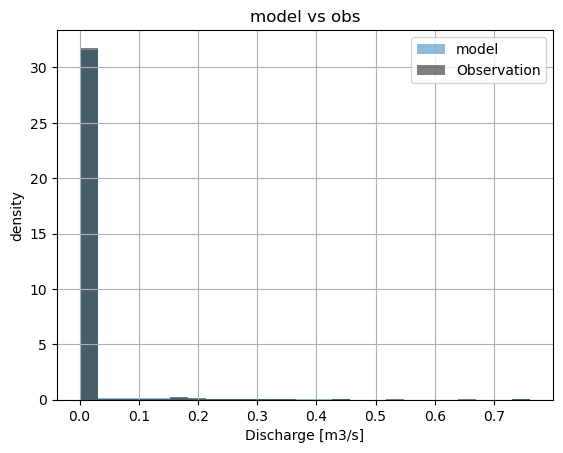

In [8]:
# Plot or calculate metric over the entire timeseries

cmp.skill(metrics='rmse')
cmp.plot.hist(bins=25)

In [9]:
# Make a new comparison that only includes pre-defined events

cmp_events = cmp.where(cmp.data.event > 0)
cmp_events

<Comparer>
Quantity: Discharge [m3/s]
Observation: obs, n_points=283
Model(s):
0: model
 Auxiliary: event

<Axes: title={'center': 'model vs obs'}, xlabel='Discharge [m3/s]', ylabel='density'>

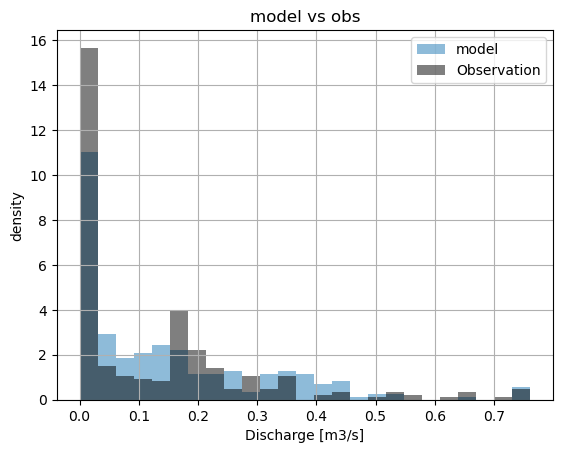

In [10]:
# Recalculate the metrics

cmp_events.skill(metrics='rmse')
cmp_events.plot.hist(bins=25)

In [11]:
# Calculate skill for each event

cmp_events.skill(by='event', metrics=['rmse']).sort_values('rmse')

,observation,n,rmse
event,,,
4.0,obs,3,0.028239
16.0,obs,2,0.032609
13.0,obs,2,0.046539
15.0,obs,9,0.062640
10.0,obs,5,0.067147
11.0,obs,9,0.075264
1.0,obs,11,0.076061
20.0,obs,4,0.091794
18.0,obs,4,0.106808


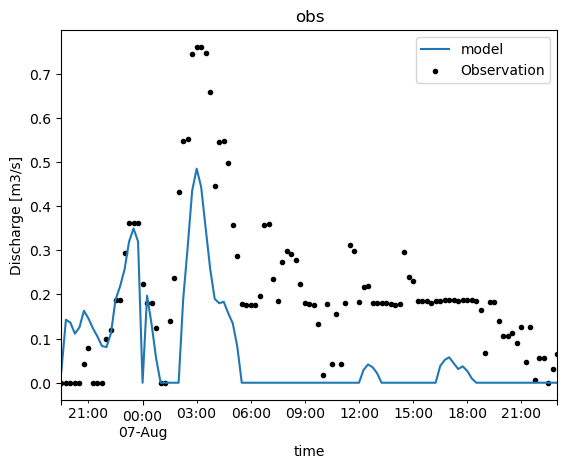

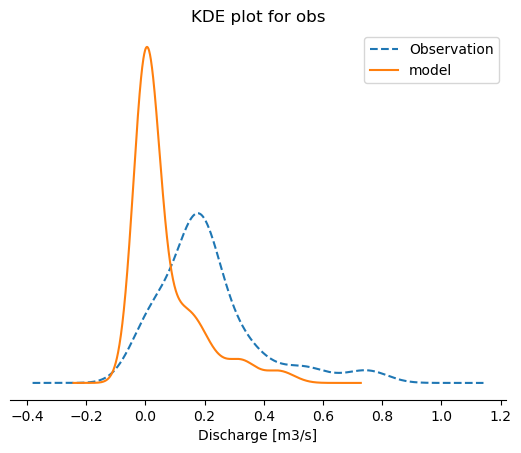

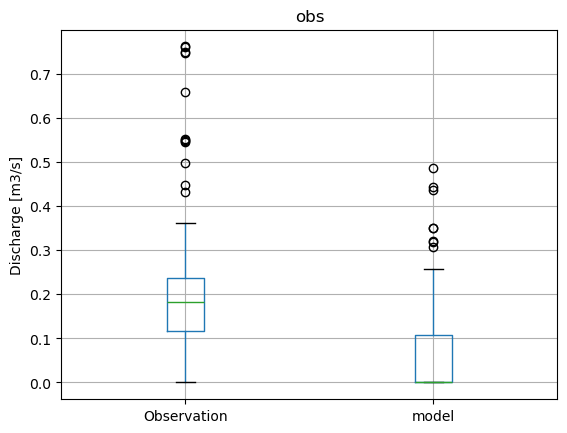

In [12]:
# Plot a specific event

event_number = 27
start_time = df[df.event == event_number].index.values[0]
end_time = df[df.event == event_number].index.values[-1]

cmp_event = cmp.where(cmp.data.event == 27).sel(start=start_time, end=end_time)
cmp_event.plot.timeseries();
cmp_event.plot.kde();
cmp_event.plot.box();